In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('acesso.csv')

In [4]:
dados

,home,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


In [5]:
dados.rename(columns = {' contato':'contact',' como_funciona':'how_it_works',' comprou':'bought'},inplace = True)

In [6]:
x = dados[['home','how_it_works','contact']]
y = dados['bought']

In [7]:
dados.shape

(99, 4)

In [8]:
train_x = x[:75]
train_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

In [9]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(train_x,train_y)

LinearSVC()

In [10]:
previsoes = modelo.predict(teste_x)

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(teste_y,previsoes)
print(f'Taxa de acerto de {accuracy*100:.2f}%')

Taxa de acerto de 95.83%


# Train & Test

In [12]:
from sklearn.model_selection import train_test_split

SEED = 20

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.25,random_state=SEED,stratify=y)

In [13]:
modelo = LinearSVC()
modelo.fit(train_x,train_y)

previsoes = modelo.predict(test_x)

accuracy = accuracy_score(test_y,previsoes)
print(f'Taxa de acerto de {accuracy*100:.2f}%')

Taxa de acerto de 96.00%


In [14]:
train_y.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [15]:
test_y.value_counts()

0    17
1     8
Name: bought, dtype: int64

In [16]:
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [18]:
dados['finished'] = dados['unfinished'].map(lambda x : 1 if x == 0 else 0)

In [23]:
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [21]:
import seaborn as sns

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

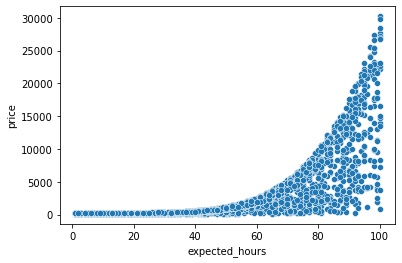

In [24]:
sns.scatterplot(x ='expected_hours',y='price',data=dados)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

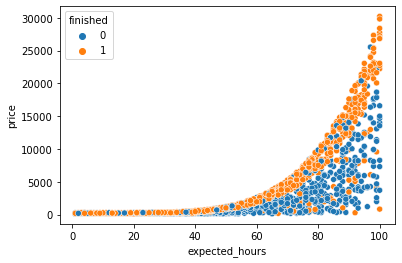

In [25]:
sns.scatterplot(x ='expected_hours',y='price',hue='finished',data=dados)

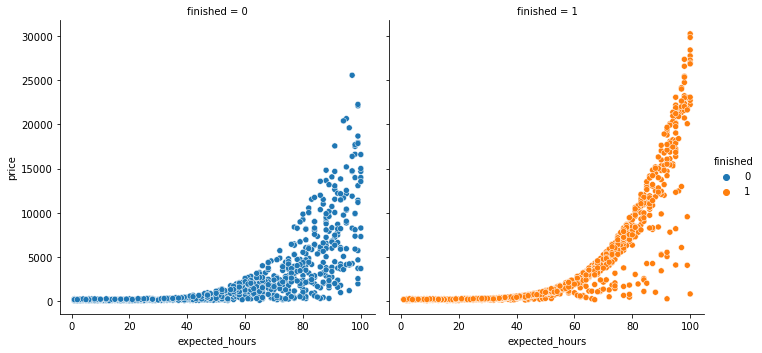

In [27]:
sns.relplot(x ='expected_hours',y='price',hue='finished',col='finished',data=dados)

In [29]:
x = dados[['expected_hours','price']]
y = dados['finished']

In [35]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [33]:
SEED = 20

In [41]:
train_x, test_x, train_y, test_y = train_test_split(x,y,
                                                    random_state = SEED, test_size = 0.25,
                                                    stratify = y)

In [42]:
print(f'Treinaremos com {len(train_x)} elementos e testaremos com {len(test_x)}')

Treinaremos com 1617 elementos e testaremos com 540


In [44]:
modelo = LinearSVC()

In [45]:
modelo.fit(train_x,train_y)
predict =  modelo.predict(test_x)

C:\Users\thanael.butewicz\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [50]:
accuracy = accuracy_score(test_y,predict) * 100
accuracy

56.666666666666664

In [56]:
dados[dados.isnull()]

,unfinished,expected_hours,price,finished
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2152,NaN,NaN,NaN,NaN
2153,NaN,NaN,NaN,NaN
2154,NaN,NaN,NaN,NaN
2155,NaN,NaN,NaN,NaN


In [58]:
import numpy as np

In [62]:
predict_base = np.ones(540) #previsao de base, nosso teste deverá ser muito melhor do que esta base

In [65]:
accuracy_base = accuracy_score(test_y,predict_base) * 100
accuracy_base

52.59259259259259

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

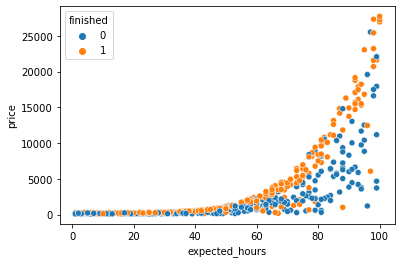

In [68]:
sns.scatterplot(x ='expected_hours',y='price',hue=test_y,data=test_x)

In [ ]:
# Duas dimensoes podemos usar 

In [70]:
x_min = test_x['expected_hours'].min()
x_max = test_x['expected_hours'].max()

In [71]:
y_min = test_x['price'].min()
y_max = test_x['price'].max()

In [76]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [80]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [85]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [86]:
import matplotlib.pyplot as plt

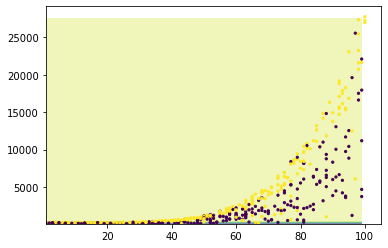

In [91]:
plt.contourf(xx,yy,Z, alpha = 0.3)
plt.scatter(test_x['expected_hours'], test_x['price'], c = test_y, s = 5 )

In [92]:
# Falho, pois estamos utilizando um modelo de ML que não suporta vetores, os modelos lineares são melhor 
# utilizados quando possuimos dados lineares (0 , 1 )

# Utilização do SVC

In [105]:
from sklearn.svm import SVC

In [106]:
SEED = 5
np.random.seed(SEED)

In [107]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

In [111]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


In [112]:
modelo = SVC(gamma='auto')
modelo.fit(train_x,train_y)
predict = modelo.predict(test_x)

In [113]:
accuracy = accuracy_score(test_y, predict) * 100
accuracy

58.88888888888889

In [115]:
x_min = test_x['expected_hours'].min()
x_max = test_x['expected_hours'].max()

y_min = test_x['price'].min()
y_max = test_x['price'].max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

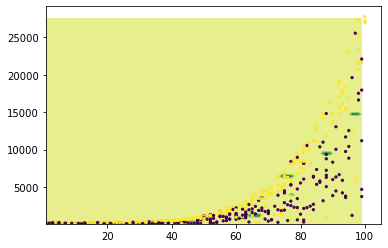

In [117]:
plt.contourf(xx,yy,Z, alpha = 0.5)
plt.scatter(test_x['expected_hours'], test_x['price'], c = test_y, s = 5 )

In [118]:
 from sklearn.preprocessing import StandardScaler

In [121]:
SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x  = scaler.transform(raw_test_x)


modelo = SVC(gamma='auto')
modelo.fit(train_x,train_y)
predict = modelo.predict(test_x)

accuracy = accuracy_score(test_y, predict) * 100
accuracy

Treinaremos com 1617 elementos e testaremos com 540 elementos


66.85185185185185

In [130]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

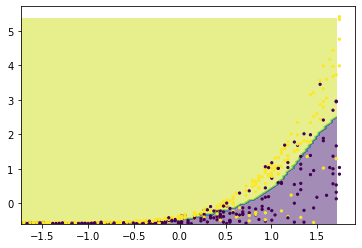

In [131]:
plt.contourf(xx,yy,Z, alpha = 0.5)
plt.scatter(data_x, data_y, c = test_y, s = 5 )